Plotting future changes in the large ensembles.  

The calculation to determine the time period over which the global mean temperature anomalies in LENS1 and LENS2 are the same is performed in 

~/snowpaper/practise/globalmeants.ipynb.

This shows that global mean TREFHT anomalies in (2060-2089) are closest to those in (2070-2099).

In [1]:
import importlib
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
import numpy as np
from math import nan

from CASutils import mapplot_utils as maps
from CASutils import colorbar_utils as cbars
from CASutils import plotposition_utils as pos
from CASutils import linfit_utils as linfit
from CASutils import readdata_utils as read
from CASutils import calendar_utils as cal
from CASutils import colorbar_utils as cbar

from cartopy.util import add_cyclic_point
importlib.reload(maps)
importlib.reload(pos)
importlib.reload(linfit)
importlib.reload(read)
importlib.reload(cal)
importlib.reload(cbar)

<module 'CASutils.colorbar_utils' from '/home/islas/python/CASanalysis/CASutils/colorbar_utils.py'>

In [2]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/"

Set up mask to mask out sea regions and regions where the present day FSNO < 0.5 base on CLM5 values

In [3]:
landfrac = xr.open_dataset('/project/cas/islas/cesmle/fx/landfraclens.nc')
landfrac = landfrac.LANDFRAC.isel(time=0)

path="/project/cas02/islas/CLM5_CLM4/raw/Isla_CAM6_CLM5_002/mon/lnd/"
fsno_clm5 = read.read_sfc_cesm(path+"FSNO_f.e21.FHIST.f09_f09.cesm2_cam6_clm5.002.1979-01_2014-12.nc","1979-01","2014-12")
fsno_clm5_djf = cal.season_mean(fsno_clm5,"FSNO",season="DJF")

maskclm5 = np.zeros([fsno_clm5.lat.size, fsno_clm5.lon.size])
maskclm5[ fsno_clm5_djf > 0.5] = 1

maskclm5nan = np.zeros([fsno_clm5.lat.size, fsno_clm5.lon.size])
maskclm5nan[:,:]=1
maskclm5nan[(fsno_clm5_djf > 0.5)] = nan
maskclm5nan[ landfrac < 0.5 ] = 0

/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


Snow density

In [4]:
lens1rho = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/LENS1/BULKSNOW/rhosnow_lens1_djf.nc")
lens2rho = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/LENS2/BULKSNOW/rhosnow_lens2_djf.nc")

rho1p = lens1rho.sel(time=slice("1979-01","2014-12")).mean('time')
rho2p = lens2rho.sel(time=slice("1979-01","2014-12")).mean('time')
rho1f = lens1rho.sel(time=slice("2060-01","2089-12")).mean('time')
rho2f = lens2rho.sel(time=slice("2070-01","2099-12")).mean('time')

rho1pm = rho1p.mean('member')
rho2pm = rho2p.mean('member')
rho1fm = rho1f.mean('member')
rho2fm = rho2f.mean('member')

Variance in Future - Past TREFHT differences

In [5]:
trefhtdjf1 = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/LENS1/trefht_lens1_djf.nc")
trefhtdjf2 = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/LENS2/trefht_lens2_djf.nc")

trefhtpast1 = trefhtdjf1.sel(time=slice("1979-01","2014-12")).mean("time")
trefhtpast2 = trefhtdjf2.sel(time=slice("1979-01","2014-12")).mean("time")
trefhtfut1 = trefhtdjf1.sel(time=slice("2060-01","2089-12")).mean("time")
trefhtfut2 = trefhtdjf2.sel(time=slice("2070-01","2099-12")).mean("time")

trefhtdif1 = trefhtfut1 - trefhtpast1
trefhtdif2 = trefhtfut2 - trefhtpast2

trefhtdif1var = trefhtdif1.var(dim="member")
trefhtdif2var = trefhtdif2.var(dim="member")

Difference in daily T2m variance

In [6]:
trefhtvarp1 = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/LENS1_djf_var.nc")
trefhtvarp2 = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/LENS2_djf_var.nc")
trefhtvarf1 = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/LENS1_djf_var_future.nc")
trefhtvarf2 = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/deseasonalized_tvar/LENS2_djf_var_future.nc")

trefhtvarp1m = trefhtvarp1.mean('member')
trefhtvarp2m = trefhtvarp2.mean('member')
trefhtvarf1m = trefhtvarf1.mean('member')
trefhtvarf2m = trefhtvarf2.mean('member')

plot the plot

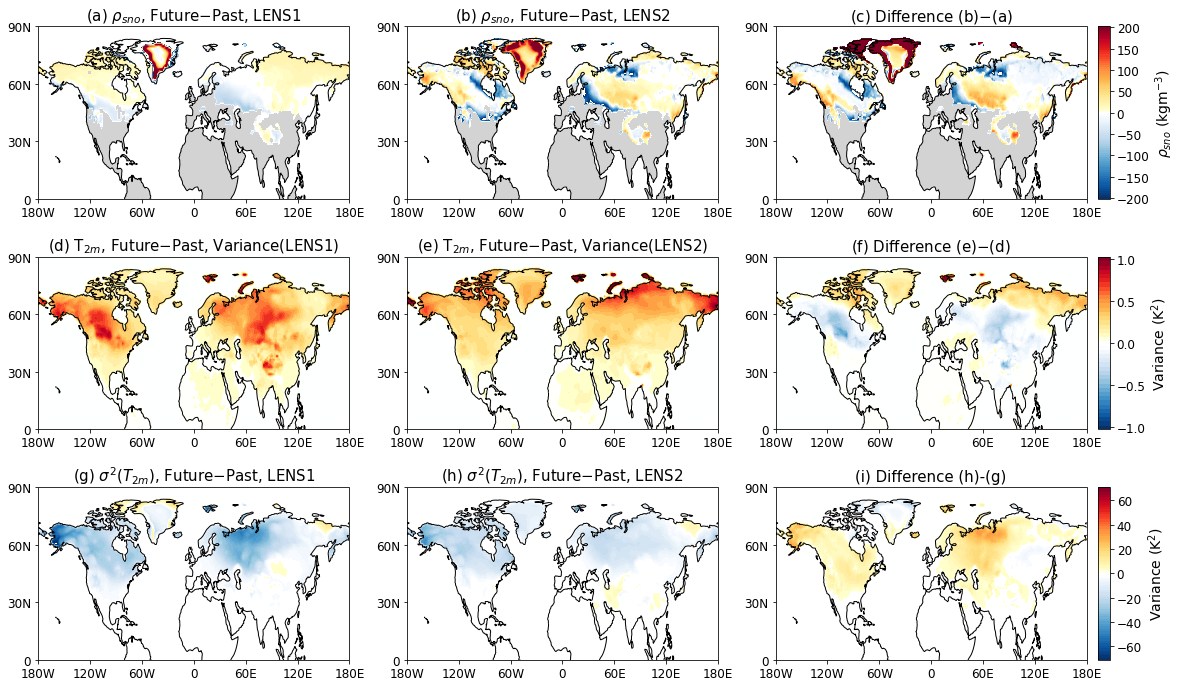

In [7]:
fig = plt.figure(figsize=(16,16))

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, ((np.array(rho1fm.rhosnow) - np.array(rho1pm.rhosnow)))*maskclm5, np.array(rho1pm.lon), np.array(rho1pm.lat),
                                               5,-200,200,'(a) $\\rho_{sno}$, Future$-$Past, LENS1',0.05,0.32,0.8,0.95)
dat, lon = add_cyclic_point(maskclm5nan, coord=rho1pm.lon)
#ax.contourf(np.array(rho1pm.lon), np.array(rho1pm.lat), maskclm5nan, levels=[0.99,1.01], colors=['lightgray','lightgray'] )
ax.contourf(lon, np.array(rho1pm.lat), dat, levels=[0.99,1.01], colors=['lightgray','lightgray'])



ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, ((np.array(rho2fm.rhosnow) - np.array(rho2pm.rhosnow)))*maskclm5, np.array(rho2pm.lon), np.array(rho2pm.lat),
                                               5,-200,200,'(b) $\\rho_{sno}$, Future$-$Past, LENS2',0.37,0.64,0.8,0.95)
#ax.contourf(np.array(rho2pm.lon), np.array(rho2pm.lat), maskclm5nan, levels=[0.99,1.01], colors=['lightgray','lightgray'])
dat, lon = add_cyclic_point(maskclm5nan, coord=rho2pm.lon)
ax.contourf(lon, np.array(rho2pm.lat), dat, levels=[0.99,1.01], colors=['lightgray','lightgray'])

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig,
                                               ((np.array(rho2fm.rhosnow) - np.array(rho2pm.rhosnow)))*maskclm5 - 
                                               ((np.array(rho1fm.rhosnow) - np.array(rho1pm.rhosnow)))*maskclm5,
                                               np.array(rho1pm.lon), np.array(rho1pm.lat),
                                               5,-200,200,'(c) Difference (b)$-$(a)',
                                               0.69,0.96,0.8,0.95)
#ax.contourf(np.array(rho1pm.lon), np.array(rho1pm.lat), maskclm5nan, levels=[0.99,1.01], colors=['lightgray','lightgray'] )
dat, lon = add_cyclic_point(maskclm5nan, coord=rho1pm.lon)
ax.contourf(lon, np.array(rho2pm.lat), dat, levels=[0.99,1.01], colors=['lightgray','lightgray'])


ax = cbar.plotcolorbar(fig, 5, -200, 200, '$\\rho_{sno}$ (kgm$^{-3}$)', 0.97,0.98,0.8,0.95,orient='vertical',
                      ticks=[-200,-150,-100,-50,0,50,100,150,200], fsize=12)



ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(trefhtdif1var.trefht)*landfrac, np.array(rho1pm.lon), np.array(rho1pm.lat), 
                                               0.05,-1,1,'(d) T$_{2m}$, Future$-$Past, Variance(LENS1)',0.05,0.32,0.6,0.75)

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(trefhtdif2var.trefht)*landfrac, np.array(rho1pm.lon), np.array(rho1pm.lat),
                                                0.05,-1,1,'(e) T$_{2m}$, Future$-$Past, Variance(LENS2)',0.37,0.64,0.6,0.75)

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, (np.array(trefhtdif2var.trefht) - np.array(trefhtdif1var.trefht))*landfrac, np.array(rho1pm.lon), np.array(rho1pm.lat),
                                                0.05,-1,1,'(f) Difference (e)$-$(d)',0.69,0.96,0.6,0.75)

ax = cbar.plotcolorbar(fig, 0.05,-1,1,'Variance (K$^{2}$)',0.97,0.98,0.6,0.75, orient='vertical',
                      ticks=[-1,-0.5,0,0.5,1], fsize=12)


ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, (np.array(trefhtvarf1m.djfvar) - np.array(trefhtvarp1m.djfvar))*landfrac, np.array(rho1pm.lon), np.array(rho1pm.lat),
                                                2,-70,70,'(g) $\sigma^{2}(T_{2m})$, Future$-$Past, LENS1',0.05,0.32,0.4,0.55)

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, (np.array(trefhtvarf2m.djfvar) - np.array(trefhtvarp2m.djfvar))*landfrac, np.array(rho1pm.lon), np.array(rho1pm.lat),
                                               2,-70,70,'(h) $\sigma^{2}(T_{2m})$, Future$-$Past, LENS2',0.37,0.64,0.4,0.55)

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, 
                                               (np.array(trefhtvarf2m.djfvar) - np.array(trefhtvarp2m.djfvar))*landfrac -
                                                (np.array(trefhtvarf1m.djfvar) - np.array(trefhtvarp1m.djfvar))*landfrac,
                                                np.array(rho1pm.lon), np.array(rho1pm.lat),
                                                2,-70,70,'(i) Difference (h)-(g)',0.69,0.96,0.4,0.55)

ax = cbar.plotcolorbar(fig, 2,-70,70,'Variance (K$^{2}$)',0.97,0.98,0.4,0.55, orient='vertical',
                      ticks=[-60,-40,-20,0,20,40,60], fsize=12)

fig.savefig(plotpath+"fig11.pdf", facecolor="white", bbox_inches="tight")